<a href="https://colab.research.google.com/github/adan35/AiDreams/blob/murtaza/emotion_detector_1dot1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the Dataset

In [ ]:
dataset = pd.read_pickle("/content/drive/My Drive/Colab Notebooks/emotion_dataset.pkl", compression='infer')
dataset.head()

,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to oth...,love


### Dimension Of the Dataset

In [ ]:
rows, cols = dataset.shape
print(f'Emotion Dataset Contains {rows} rows and {cols} columns')

Emotion Dataset Contains 416809 rows and 2 columns


### Types of the Dataset

In [ ]:
dataset.dtypes

text        object
emotions    object
dtype: object

### Visualize Unique and Duplicates Entities in  Dataset

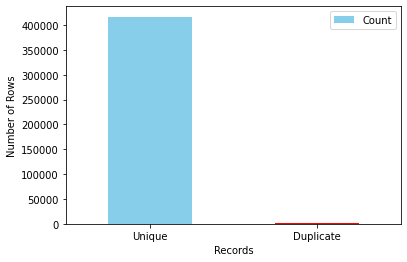

In [ ]:
dup_rows = rows - len(dataset.drop_duplicates(subset=['text', 'emotions']))
dup_vis = pd.DataFrame({'Rows':['Unique', 'Duplicate'], 'Count':[rows, dup_rows]})
dup_vis.plot.bar(x='Rows', y='Count', xlabel='Records', ylabel='Number of Rows', rot=0, color=['skyblue', 'red'])

### Remove Duplicates Entities of the Dataset

In [ ]:
dataset = dataset.drop_duplicates(subset=['text', 'emotions'])
print(f"Duplicate entities of the dataset were {dup_rows}") 
print(f"After dropping duplicate rows the remaining rows x cols of the dataset are {dataset.shape[0]} x {dataset.shape[1]}") 

Duplicate entities of the dataset were 686
After dropping duplicate rows the remaining rows x cols of the dataset are 416123 x 2


### Checking For Null Values in the Dataset

In [ ]:
dataset.isna().any()

text        False
emotions    False
dtype: bool

In [ ]:
print('There are no NULL values in the dataset')

There are no NULL values in the dataset


### Summary of the Dataset

In [ ]:
dataset.describe()

,text,emotions
count,416123,416123
unique,393822,6
top,when,joy
freq,4,140779


### Visualizing the Number of Entities against each Emotion

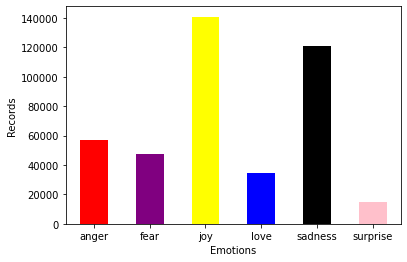

In [ ]:
dataset.groupby(['emotions'])['emotions'].count().plot.bar(xlabel='Emotions', ylabel='Records', rot=0, color=['red', 'purple', 'yellow', 'blue', 'black', 'pink'])

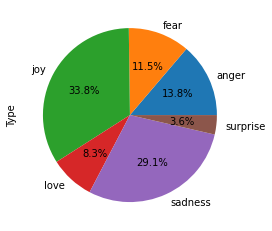

In [ ]:
dataset.groupby('emotions').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

### Cleaning the Dataset

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
# clean the text
def clean_text(text):
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
# replace the old text with the cleaned text
dataset['text'] = dataset['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
dataset.head()

,text,emotions
27383,feel awful job get position succeed happen,sadness
110083,im alone feel awful,sadness
140764,ive probably mentioned really feel proud actua...,joy
100071,feeling little low days back,sadness
2837,beleive much sensitive peoples feelings tend c...,love


In [ ]:
dataset.tail()

,text,emotions
566,felt finally accepted bulgarian conservatorie ...,joy
36236,take every day comes focussing eating better m...,fear
76229,suddenly feel everything fake,sadness
131640,im feeling eager ever claw back went pear shap...,joy
64703,give plenty attention even feel utterly miserable,sadness


Dividing the 6 different labels classes in to their individual classes for downsampling

In [ ]:
anger       = dataset[dataset["emotions"] == "anger"]
fear        = dataset[dataset["emotions"] == "fear"]
joy         = dataset[dataset["emotions"] == "joy"]
love        = dataset[dataset["emotions"] == "love"]
sadness     = dataset[dataset["emotions"] == "sadness"]
surprise    = dataset[dataset["emotions"] == "surprise"]

print('Anger:       ',anger.shape)
print('Fear:        ',fear.shape)
print('Joy:         ',joy.shape)
print('Love:        ',love.shape)
print('Sadness:     ',sadness.shape)
print('Surprise:    ',surprise.shape)

Anger:        (57235, 2)
Fear:         (47664, 2)
Joy:          (140779, 2)
Love:         (34497, 2)
Sadness:      (120989, 2)
Surprise:     (14959, 2)


Downsampling the individual dataset to "SURPRISE" dataset length because it has the least values

In [ ]:
from sklearn.utils import resample
anger_downsample = resample(anger,
             replace=True,
             n_samples=len(surprise),
             random_state=42)
fear_downsample = resample(fear,
             replace=True,
             n_samples=len(surprise),
             random_state=42)
joy_downsample = resample(joy,
             replace=True,
             n_samples=len(surprise),
             random_state=42)
love_downsample = resample(love,
             replace=True,
             n_samples=len(surprise),
             random_state=42)
sadness_downsample = resample(sadness,
             replace=True,
             n_samples=len(surprise),
             random_state=42)

print('Anger:       ',anger_downsample.shape)
print('Fear:        ',fear_downsample.shape)
print('Joy:         ',joy_downsample.shape)
print('Love:        ',love_downsample.shape)
print('Sadness:     ',sadness_downsample.shape)
print('Surprise:    ',surprise.shape)

Anger:        (14959, 2)
Fear:         (14959, 2)
Joy:          (14959, 2)
Love:         (14959, 2)
Sadness:      (14959, 2)
Surprise:     (14959, 2)
(14959, 2)


Concating the dataset together again

and visualing the dataset

*   List item
*   List item



In [1]:


dataset_downsampled = pd.concat([anger_downsample, fear_downsample, joy_downsample, love_downsample, sadness_downsample, surprise ])

print(dataset_downsampled["emotions"].value_counts())

dataset_downsampled.groupby('emotions').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')



NameError: ignored

[link text](https:// [link text](https://))saving data to google drive

In [ ]:

  dataset_downsampled.to_csv("/content/drive/My Drive/Colab Notebooks/dataset_emotions_downsampled.csv")

  df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset_emotions_downsampled.csv')

  df.head(1000)

,Unnamed: 0,text,emotions
0,49682,watch feeling heartless aching pick,anger
1,21293,feel like vicious cycle lately dumb things won...,anger
2,31630,get layouts without feeling distracted,anger
3,11616,feel rude trying get point across,anger
4,52234,im feelin rebellious,anger
...,...,...,...
995,29185,feel book dangerous least would swayed misused...,anger
996,11852,anything terribly earth shattering today feeli...,anger
997,13013,ended ignoring key details article commitment ...,anger
998,22871,feel like readers attention distracted informa...,anger


Randomizing the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset_emotions_downsampled.csv')

print(df.head(1000))

df = df.sample(frac = 1)

print(df.head(1000))

df.to_csv("/content/drive/My Drive/Colab Notebooks/dataset_emotions_downsampled.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     Unnamed: 0  Unnamed: 0.1  \
0         19541         37895   
1         41020        117746   
2         61564         34343   
3         44590         25977   
4         42791         37205   
..          ...           ...   
995        1914         32224   
996       84978         14512   
997       54555          4413   
998       71797         90131   
999       56561         23173   

                                                  text  emotions  
0                                used feel intimidated      fear  
1                 baby felt feel still safe happy like       joy  
2      feel homesick pretty sick feeling homesick home   sadness  
3    dont know point last two weeks feel like sudde...       joy  
4    feel glad introduce colgates health tip blog h...       joy  
..                                                 ...       ...  
995  